In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import pandas as pd
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25420 entries, 0 to 25419
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timeStamp        25420 non-null  int64  
 1   elapsed          25420 non-null  int64  
 2   label            25420 non-null  object 
 3   responseCode     24412 non-null  object 
 4   responseMessage  25420 non-null  object 
 5   threadName       25420 non-null  object 
 6   dataType         16928 non-null  object 
 7   success          25420 non-null  bool   
 8   failureMessage   0 non-null      float64
 9   bytes            25420 non-null  int64  
 10  sentBytes        25420 non-null  int64  
 11  grpThreads       25420 non-null  int64  
 12  allThreads       25420 non-null  int64  
 13  URL              23420 non-null  object 
 14  Latency          25420 non-null  int64  
 15  IdleTime         25420 non-null  int64  
 16  Connect          25420 non-null  int64  
dtypes: bool(1), 

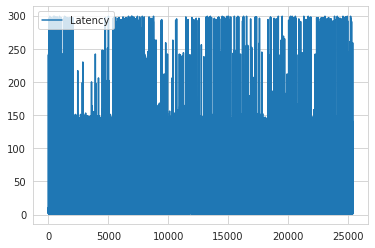

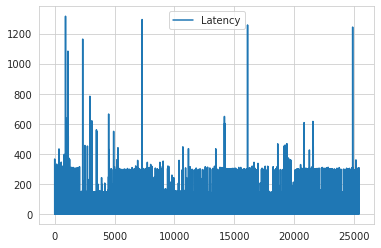

In [101]:
df = pd.read_csv (r'/content/drive/MyDrive/Proyecto Distribuidos/test_results3.csv')
df2=df.copy()
#print(type(df))
print(df.info())
#print(df.loc[:,'Latency'])
df.loc[((df['Latency']>0) & (df['Latency'] <300)),['Latency']].plot()
df.loc[((df['Latency']>0) ),['Latency']].plot()
print("Cantidad de Registrar sobrantes: ",df.loc[((df['Latency']>0) & (df['Latency'] <300)),['Latency']].size)
print (df2)

In [102]:
datosProm = pd.DataFrame(columns=['Latency'])
for i in range(100):
      print("Estoy recorriendo el el Thread numero: ",(i+1))
      #print(df.loc[((df['Latency']>0) & (df['Latency'] <100) & (df['grpThreads'] == i+1)),['Latency','grpThreads']])
      #print((df.loc[((df['Latency']>0) & (df['Latency'] <100) & (df['grpThreads'] == i+1)),['Latency','grpThreads']]).size)

      #Con esto estoy filtrando a aquellos que tengan una latencia mayor a 0 y menor a 300, para asi poder quitar los datos aberrantes
      #print(df.loc[((df['Latency']>0) & (df['Latency'] <300) & (df['grpThreads'] == i+1)),['Latency','grpThreads']]).mean(axis = 0, skipna = True)
      serieTemp = (df.loc[((df['Latency']>0) & (df['Latency'] <300) & (df['grpThreads'] == i+1)),['Latency','grpThreads']]).mean(axis = 0, skipna = True) 
      print(serieTemp )
      #print(type(serieTemp))
      latenciaThread = serieTemp.get(key = 'Latency') 
      datosProm.loc[int(i+1)] = [latenciaThread]

print(datosProm)



Estoy recorriendo el el Thread numero:  1
Latency       47.5
grpThreads     1.0
dtype: float64
Estoy recorriendo el el Thread numero:  2
Latency       31.354839
grpThreads     2.000000
dtype: float64
Estoy recorriendo el el Thread numero:  3
Latency       30.255814
grpThreads     3.000000
dtype: float64
Estoy recorriendo el el Thread numero:  4
Latency       47.259259
grpThreads     4.000000
dtype: float64
Estoy recorriendo el el Thread numero:  5
Latency       48.615385
grpThreads     5.000000
dtype: float64
Estoy recorriendo el el Thread numero:  6
Latency       23.214286
grpThreads     6.000000
dtype: float64
Estoy recorriendo el el Thread numero:  7
Latency       43.717949
grpThreads     7.000000
dtype: float64
Estoy recorriendo el el Thread numero:  8
Latency       24.692308
grpThreads     8.000000
dtype: float64
Estoy recorriendo el el Thread numero:  9
Latency       17.583333
grpThreads     9.000000
dtype: float64
Estoy recorriendo el el Thread numero:  10
Latency       33.73170

Text(0.5, 0, 'Usuarios')

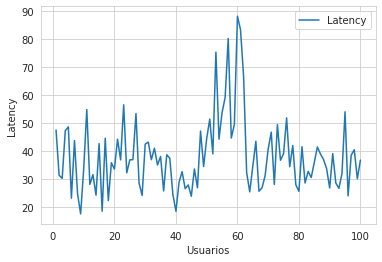

In [103]:
ax = datosProm.plot()
ax.locator_params(integer=True)


plt.ylabel('Latency')
plt.xlabel('Usuarios')

